In [73]:
# Visualization modulesrimport matplotlib.pyplot as plt
# Import data preprocessing modules
import pandas as pd
import seaborn as sns
from keras.layers.core import Dense, Activation

# Install Keras and Sklearn
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [74]:
%matplotlib inline
# Set seaborn as the default drawing library
sns.set()

# Train Data

In [75]:
# Read the file
train_set = pd.read_csv("input/titanic.csv", encoding="utf8")

In [76]:
# Name
train_set["Title"] = train_set["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)


def title_mapping(title: str):
    titles = {"Mr": 0, "Miss": 1, "Mrs": 2}
    if title in titles.keys():
        return titles[title]
    return 3


train_set["Title"] = train_set["Title"].map(title_mapping)
train_set["Title"] = train_set["Title"].astype(int)
train_set.drop("Name", axis=1, inplace=True)

In [77]:
# Sex
sex_mapping = {"male": 0, "female": 1}
train_set["Sex"] = train_set["Sex"].map(sex_mapping)
train_set["Sex"] = train_set["Sex"].astype(int)

In [78]:
# Age
train_set["Age"].fillna(train_set.groupby("Title")["Age"].transform("median"), inplace=True)
train_set.loc[train_set["Age"] <= 16, "Age"] = 0
train_set.loc[(train_set["Age"] > 16) & (train_set["Age"] <= 26), "Age"] = 1
train_set.loc[(train_set["Age"] > 26) & (train_set["Age"] <= 36), "Age"] = 2
train_set.loc[(train_set["Age"] > 36) & (train_set["Age"] <= 62), "Age"] = 3
train_set.loc[train_set["Age"] > 62, "Age"] = 4
train_set["Age"] = train_set["Age"].astype(int)

In [79]:
# Embarked
train_set["Embarked"] = train_set["Embarked"].fillna("S")
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train_set["Embarked"] = train_set["Embarked"].map(embarked_mapping)
train_set["Embarked"] = train_set["Embarked"].astype(int)

In [80]:
# Fare
train_set["Fare"].fillna(train_set.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train_set.loc[train_set["Fare"] <= 17, "Fare"] = 0
train_set.loc[(train_set["Fare"] > 17) & (train_set["Fare"] <= 30), "Fare"] = 1
train_set.loc[(train_set["Fare"] > 30) & (train_set["Fare"] <= 100), "Fare"] = 2
train_set.loc[train_set["Fare"] > 100, "Fare"] = 3
train_set["Fare"] = train_set["Fare"].astype(int)

In [81]:
# Cabin
train_set["Cabin"] = train_set["Cabin"].str[:1]
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
train_set["Cabin"] = train_set["Cabin"].map(cabin_mapping)
train_set["Cabin"].fillna(train_set.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
train_set["Cabin"] = train_set["Cabin"].astype(float)

In [82]:
# Sibsp & Parch
train_set["FamilySize"] = train_set["SibSp"] + train_set["Parch"] + 1
family_mapping: dict = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train_set["FamilySize"] = train_set["FamilySize"].map(family_mapping)
train_set["FamilySize"] = train_set["FamilySize"].astype(float)

In [83]:
# Delete Sibsp, Parch, Ticket
feature_drop = ["Ticket", "SibSp", "Parch"]
train_set = train_set.drop(feature_drop, axis=1)

In [84]:
# Set Target Variables and Explanatory Variables
train_set_data = train_set.drop("Survived", axis=1)
train_set_label = train_set[["Survived"]]

In [85]:
# Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_set_data = minmax_scale.fit_transform(train_set_data)

# Test Data

In [86]:
test_set = pd.read_csv("input/test.csv", encoding="utf8")

In [87]:
# Name
test_set["Title"] = test_set["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)


def title_mapping(title: str):
    titles = {"Mr": 0, "Miss": 1, "Mrs": 2}
    if title in titles.keys():
        return titles[title]
    return 3


test_set["Title"] = test_set["Title"].map(title_mapping)
train_set["Title"] = train_set["Title"].astype(int)
test_set.drop("Name", axis=1, inplace=True)

In [88]:
# Sex
sex_mapping = {"male": 0, "female": 1}
test_set["Sex"] = test_set["Sex"].map(sex_mapping)
test_set["Sex"] = test_set["Sex"].astype(int)

In [89]:
# Age
test_set["Age"].fillna(test_set.groupby("Title")["Age"].transform("median"), inplace=True)
test_set.loc[test_set["Age"] <= 16, "Age"] = 0
test_set.loc[(test_set["Age"] > 16) & (test_set["Age"] <= 26), "Age"] = 1
test_set.loc[(test_set["Age"] > 26) & (test_set["Age"] <= 36), "Age"] = 2
test_set.loc[(test_set["Age"] > 36) & (test_set["Age"] <= 62), "Age"] = 3
test_set.loc[test_set["Age"] > 62, "Age"] = 4
test_set["Age"] = test_set["Age"].astype(int)

In [90]:
# Embarked (登船地點)
test_set["Embarked"] = test_set["Embarked"].fillna("S")
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
test_set["Embarked"] = test_set["Embarked"].map(embarked_mapping)
test_set["Embarked"] = test_set["Embarked"].astype(int)

In [91]:
# Fare(票價)
test_set["Fare"].fillna(test_set.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_set.loc[test_set["Fare"] <= 17, "Fare"] = 0
test_set.loc[(test_set["Fare"] > 17) & (test_set["Fare"] <= 30), "Fare"] = 1
test_set.loc[(test_set["Fare"] > 30) & (test_set["Fare"] <= 100), "Fare"] = 2
test_set.loc[test_set["Fare"] > 100, "Fare"] = 3
test_set["Fare"] = test_set["Fare"].astype(int)

In [92]:
# Cabin
test_set["Cabin"] = test_set["Cabin"].str[:1]
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
test_set["Cabin"] = test_set["Cabin"].map(cabin_mapping)
test_set["Cabin"].fillna(test_set.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_set["Cabin"] = test_set["Cabin"].astype(float)

In [93]:
# FamilySize
test_set["FamilySize"] = test_set["SibSp"] + test_set["Parch"] + 1
family_mapping: dict = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
test_set["FamilySize"] = test_set["FamilySize"].map(family_mapping)
test_set["FamilySize"] = test_set["FamilySize"].astype(float)

In [94]:
# Data Cleaning (資料清洗)
feature_drop = ["Ticket", "SibSp", "Parch"]
test_set = test_set.drop(feature_drop, axis=1)

In [95]:
# Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
test_set = minmax_scale.fit_transform(test_set)

# Model

# Build the model-DNN

In [96]:
# Create Model Function
def DNN():
    model = Sequential()
    model.add(Dense(input_dim=9, units=40))
    model.add(Activation("relu"))
    model.add(Dense(units=100))
    model.add(Activation("relu"))
    model.add(Dense(units=10))
    model.add(Activation("relu"))
    model.add(Dense(units=1))
    model.add(Activation("sigmoid"))
    model.summary()

    return model

In [97]:
# Create a Drawing Function
def show_train_history(train_history, train, validation, label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(label)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [98]:
model = DNN()
# Train Model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])
train_history = model.fit(train_set_data, train_set_label, validation_split=0.2, batch_size=30, epochs=20)
# Evaluate training result
score = model.evaluate(x=train_set_data, y=train_set_label)
print("\nTrain Loss:", score[0])
print("\nTrain Acc:", score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 40)                400       
                                                                 
 activation_8 (Activation)   (None, 40)                0         
                                                                 
 dense_9 (Dense)             (None, 100)               4100      
                                                                 
 activation_9 (Activation)   (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 activation_10 (Activation)  (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

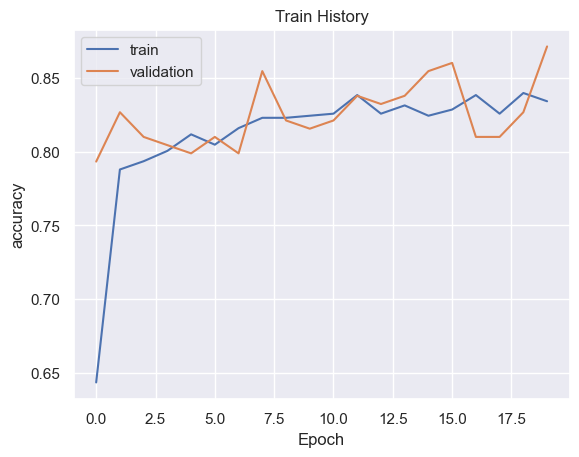

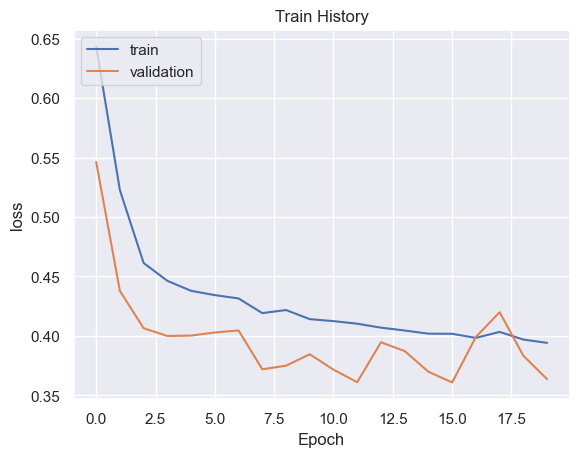

In [99]:
# Show Training Process
show_train_history(train_history, "acc", "val_acc", "accuracy")
show_train_history(train_history, "loss", "val_loss", "loss")

In [100]:
W, b = model.layers[0].get_weights()
print("weights = {}, \n\nbiases = {}".format(W, b))

weights = [[ 0.37326157 -0.40093488 -0.18645133  0.33582845 -0.19828475 -0.24622557
   0.08570698  0.18613826  0.09125245 -0.00182215 -0.12595865  0.23675673
   0.26215523  0.08506303 -0.11521262 -0.04196816 -0.07534149  0.22266473
  -0.3021242   0.13412528  0.26548153  0.06200015 -0.34518933 -0.03204253
   0.08270919  0.22247717 -0.04666443  0.33509293  0.07331009 -0.06929991
   0.35984898  0.1844349  -0.2067288  -0.01444224  0.18930167  0.08806486
  -0.10012057  0.1876046   0.1198518  -0.16773131]
 [-0.16981244  0.10855047 -0.31289884 -0.14448692  0.42018065  0.09087567
  -0.4274726   0.32901     0.1281451  -0.28514397 -0.03669112  0.04044982
  -0.18858881 -0.26848394  0.34282216  0.06829016  0.06103009  0.20320313
  -0.03824411 -0.29585177  0.1954717   0.3300211   0.13403045 -0.08565143
  -0.07921391 -0.27424634  0.10046861 -0.0800734   0.06883647  0.32742944
  -0.13960755  0.16253805  0.27070013  0.08227336 -0.36716557 -0.33932912
  -0.08336806  0.04843303 -0.20083301  0.22394325]


In [101]:
predictions = model.predict(test_set)
predictions = predictions.flatten()
testdata_write = pd.read_csv("input/test.csv", encoding="utf8")
submission = pd.DataFrame({"PassengerId": testdata_write["PassengerId"], "Survived": predictions})
submission["Survived"] = submission["Survived"].astype(int)
submission.to_csv("result/DNN_submission.csv", index=False, encoding="utf8")

14/14 [==============================] - 0s 1ms/step


In [102]:
!kaggle competitions submit -f 'result/DNN_submission.csv' -m 'DNN model' titanic

100%|████████████████████████████████████████| 2.77k/2.77k [00:03<00:00, 812B/s]
Successfully submitted to Titanic - Machine Learning from Disaster

# SVM

In [103]:
model = SVC()
model.fit(train_set_data, train_set["Survived"])

SVC()

In [104]:
predictions = model.predict(test_set)
predictions = predictions.flatten()
testdata_write = pd.read_csv("input/test.csv", encoding="utf8")
submission = pd.DataFrame({"PassengerId": testdata_write["PassengerId"], "Survived": predictions})
submission["Survived"] = submission["Survived"].astype(int)
submission.to_csv("result/SVM_submission.csv", index=False, encoding="utf8")

In [105]:
!kaggle competitions submit -f 'result/SVM_submission.csv' -m 'SVM model' titanic

100%|████████████████████████████████████████| 2.77k/2.77k [00:04<00:00, 678B/s]
Successfully submitted to Titanic - Machine Learning from Disaster

# Random Forest

In [106]:
model = RandomForestClassifier(n_estimators=700)
model.fit(train_set_data, train_set["Survived"])

RandomForestClassifier(n_estimators=700)

In [107]:
predictions = model.predict(test_set)
predictions = predictions.flatten()
testdata_write = pd.read_csv("input/test.csv", encoding="utf8")
submission = pd.DataFrame({"PassengerId": testdata_write["PassengerId"], "Survived": predictions})
submission["Survived"] = submission["Survived"].astype(int)
submission.to_csv("result/Random_Forest_submission.csv", index=False, encoding="utf8")

In [108]:
!kaggle competitions submit -f 'result/Random_Forest_submission.csv' -m 'Random Forest model' titanic

100%|████████████████████████████████████████| 2.77k/2.77k [00:04<00:00, 698B/s]
Successfully submitted to Titanic - Machine Learning from Disaster